# GPyTutorial

In which Kui figures out how to use GPy. Cribbed from http://gpytest2.readthedocs.org/en/latest/tuto_GP_regression.html

In [4]:
import numpy as np
import GPy

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
GPy.kern.RBF

GPy.kern._src.rbf.RBF

Calling GPRegression must fit the function... or how else would it know how to compute the log-likelihood?

In [ ]:
Y

In [11]:
X = np.random.uniform(-3, 3, (20, 1))
Y = np.sin(X) + np.random.randn(20, 1) * 0.05

kernel = GPy.kern.RBF(input_dim=1, variance=1, lengthscale=1)
# Note that default values of variance and length-scale are set.
#kernel = GPy.kern.RBF(input_dim=1)
model = GPy.models.GPRegression(X, Y, kernel)

print model


Name                              : GP regression
Log-likelihood                    : -22.9826933905
Number of Parameters              : 3
Number of Optimization Parameters : 3
Updates                           : True
Parameters:
  GP_regression.           |  Value  |  Constraint  |  Prior  |  Tied to
  rbf.variance             |    1.0  |     +ve      |         |         
  rbf.lengthscale          |    1.0  |     +ve      |         |         
  Gaussian_noise.variance  |    1.0  |     +ve      |         |         


{'dataplot': {'dataplot': [<matplotlib.lines.Line2D at 0x1138ddfd0>]},
 'gpplot': [[<matplotlib.lines.Line2D at 0x1138c5710>],
  [<matplotlib.lines.Line2D at 0x1138dd450>]]}

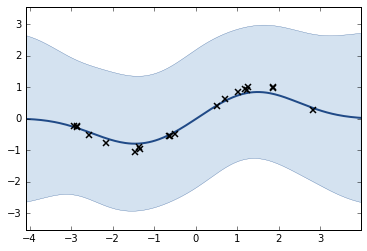

In [12]:
model.plot()

Hyperparameter optimization (maximize the marginal likelihood). Note that it is nonconvex (?? why ??), which is why we use so many restarts (??) Huh? I am very confused all here.

Puts positivity and box constraints.

In [18]:
model.constrain_positive??

In [16]:
model.unconstrain('')
model.constrain_positive('.*rbf_variance')
#model.constrain_bounded('.*lengthscale', 1.0, 10.0)
#model.constrain_fixed('.*noise', 0.0025)

model.optimize(num_restarts = 10)
print model
model.plot()

TypeError: __init__() got an unexpected keyword argument 'num_restarts'

GP_regression.,Value,Constraint,Prior,Tied to
rbf.variance,2.05296288948,+ve,,
rbf.lengthscale,0.263279001971,+ve,,
Gaussian_noise.variance,0.0130289136802,+ve,,


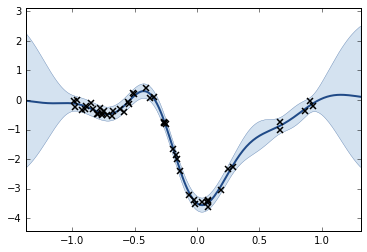

In [26]:
GPy.examples.regression.toy_rbf_1d_50()

In [36]:
GPy.examples.regression.sparse_GP_regression_2D(num_samples=30000, num_inducing=3000)

KeyboardInterrupt caught, calling on_optimization_end() to round things up


KeyboardInterrupt: 